In [18]:
import torch
import torchvision
from torchvision import datasets, transforms
from torch.utils import data
torch.set_default_tensor_type(torch.cuda.FloatTensor)

root_dir = "./data/train";
train_set = datasets.ImageFolder(root = root_dir,
                transform = transforms.ToTensor())

trainloader = data.DataLoader(train_set, batch_size = 4, shuffle = True)

root_dir = "./data/test";
train_set = datasets.ImageFolder(root = root_dir,
                transform = transforms.ToTensor())

testloader = data.DataLoader(train_set, batch_size = 4, shuffle = True)

# classes = torch.tensor(range(0,28))
classes = ('Natalie Portman', 'Julia Roberts', 'Neil Patrick Harris'
                    , 'Keifer Sutherland', 'Ben Stiller', 'Anne Hathaway'
                    , 'David Boreanaz', 'Jamie Foxx', 'Sofia Vergara'
                    , 'Elizabeth Banks', 'Jensen Ackles', 'Amy Adams'
                    , 'Kristen Bell', 'Bradley Cooper', 'Emily Deschanel'
                    , 'Zooey Deschanel', 'Jon Hamm', 'Scarlett Johansson'
                    , 'Blake Lively', 'Eva Longoria', 'Amy Poehler'
                    , 'Kristen Stewart', 'Kerry Washington', 'Leighton Meester'
                    , 'Olivia Wilde', 'Zac Efron', 'Miley Cyrus','Jim Parsons')
print(classes[0])


print("train size: " + str(len(trainloader)))

print("test size: " + str(len(testloader)))

Natalie Portman
train size: 2800
test size: 693


torch.Size([4, 3, 250, 250])
Jon Hamm


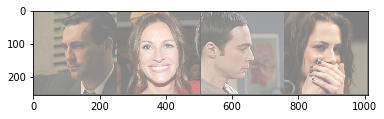

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images.shape)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(1)))

In [20]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self, device):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 11)
        self.conv2 = nn.Conv2d(6, 12, 9)
        self.conv3 = nn.Conv2d(12, 24, 5)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.pool3 = nn.MaxPool2d(3,3)
        self.fc1 = nn.Linear(24 * 10 * 10, 240)       #coś tu się dzieje, nie jestem pewnien co
        self.fc2 = nn.Linear(240, 120)
        self.fc3 = nn.Linear(120, 28)

    def forward(self, x):
        # print(x.shape)
        x = self.pool3(F.relu(self.conv1(x)))
        # print(x.shape)
        x = self.pool3(F.relu(self.conv2(x)))

        x = self.pool2(F.relu(self.conv3(x)))
        # print(x.shape)
        # print("to tu?")
        x = x.view(-1, 24 * 10 * 10)
        # print(x.shape)
        x = F.relu(self.fc1(x))
        # print(x.shape)
        x = F.relu(self.fc2(x))
        # print(x.shape)
        x = self.fc3(x)
        # print(x.shape)
        return x


net = Net(device='cuda:0')
# print(net.parameters())

In [21]:
import torch.optim as optim


# criterion = nn.L1Loss()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [22]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


In [23]:
torch.set_default_tensor_type(torch.cuda.FloatTensor)
def accuracy():
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        print('Accuracy of the network on the 2772 test images: %f %%' % (
        100 * correct / total))


In [24]:
counter=0
for epoch in range(10):  # loop over the dataset multiple times


    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        # inputs, labels = data
        inputs, labels = data[0].to(device), data[1].to(device)
        # print(inputs.shape)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        # print(outputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 1000 == 999:    # print every 2000 mini-batches
            counter += 1
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 1000))
            running_loss = 0.0
    accuracy()

print('Finished Training')



[1,  1000] loss: 3.332
[1,  2000] loss: 3.299
Accuracy of the network on the 2772 test images: 18.434343 %
[2,  1000] loss: 2.748
[2,  2000] loss: 2.395
Accuracy of the network on the 2772 test images: 38.780664 %
[3,  1000] loss: 1.903
[3,  2000] loss: 1.748
Accuracy of the network on the 2772 test images: 53.246753 %
[4,  1000] loss: 1.408
[4,  2000] loss: 1.388
Accuracy of the network on the 2772 test images: 55.880231 %
[5,  1000] loss: 1.071
[5,  2000] loss: 1.111
Accuracy of the network on the 2772 test images: 63.600289 %
[6,  1000] loss: 0.843
[6,  2000] loss: 0.922
Accuracy of the network on the 2772 test images: 60.064935 %
[7,  1000] loss: 0.705
[7,  2000] loss: 0.750
Accuracy of the network on the 2772 test images: 61.075036 %
[8,  1000] loss: 0.587
[8,  2000] loss: 0.601
Accuracy of the network on the 2772 test images: 62.157287 %
[9,  1000] loss: 0.513
[9,  2000] loss: 0.576
Accuracy of the network on the 2772 test images: 61.976912 %
[10,  1000] loss: 0.445
[10,  2000] l

batch size 4 ~ 62% accuracy
